# Introduction 

Weilun Tang 

Written by 10/16/2021. Modified by 10/17/2021, 10/18/2021, 10/19/2021

This program is to generate an animation of Brownian Motion and redioactive decay with 2000 random number with non-uniformed distribution 

# Imports

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from matplotlib.animation import FuncAnimation

# Main Loop

# Brownian Motion

<IPython.core.display.Javascript object>


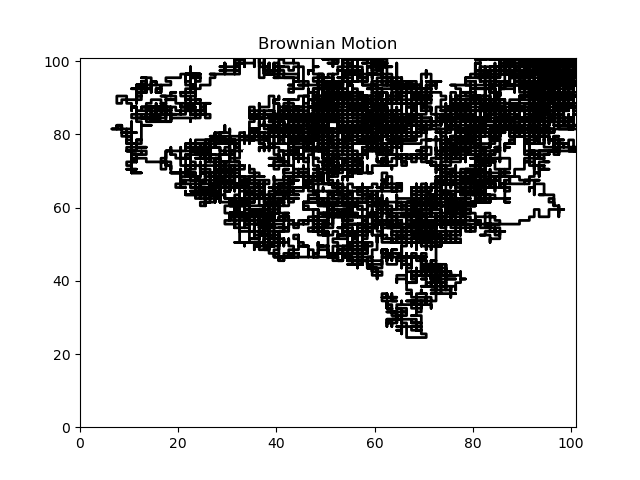

In [57]:
%matplotlib notebook
L1 = 101
L2 = 101
N = 1000

x = L1/2
y = L2/2
x_data = []
y_data = []

fig,ax = plt.subplots()
ax.set_xlim(0, L1)
ax.set_ylim(0,L2)
line, = ax.plot(0, 0, color = 'k', lw = 2)

#This function generates the frams for the animation. So it is called repeatedly.
#It is similar to the for loop in Lecture 14.1 Brownian Motion 
def frame(i):
    #let x and y be global variables 
    #If x and y were not global, the values pass in this function will always be 
    #x = L1 /2 and y = L2 / 2
    global x
    global y
    direction = randint(1,4)
    
    #Random walk with boundary condition 
    if x < L1 and direction == 1:
        x += 1
    elif x > 0 and direction == 2:
        x -= 1
    elif y < L2 and direction == 3:
        y += 1
    elif y > 0 and direction == 4:
        y -= 1
    
    #Store the values for the coordinates of line 
    x_data.append(x)
    y_data.append(y)
    line.set_xdata(x_data)
    line.set_ydata(y_data)
    ax.set_title('Brownian Motion')
    return line,
    
animation = FuncAnimation(fig, func = frame, 
                          frames = 1000, interval = 1)  #change interval to 1
                                                        #so the animation goes faster


# Radioactive Decay 

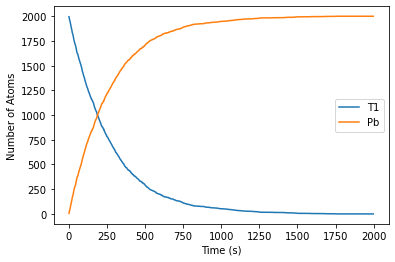

In [39]:
tau = 3.053 * 60
N_atom = 2000
N_time = 2000
mu = np.log(2) / tau
N_Pb = np.zeros([N_time - 1])
N_T1 = N_atom * np.ones([N_time - 1])

for i in range(N_atom):
    z0 = np.random.random()
    x0 = int(-np.log(1 - z0) / mu)
    if x0 < N_time:
        N_Pb[x0:] += 1
        N_T1[x0:] -= 1

plt.plot(N_T1, label = 'T1')
plt.plot(N_Pb, label = 'Pb')
plt.xlabel("Time (s)")
plt.ylabel("Number of Atoms")
plt.legend()
plt.show()

Credit: tutors 